### 데이터 다운로드 후 불러오기


In [60]:
import numpy as np
import pandas as pd

# CSV 경로
csv_path = "data/IMDB top 1000.csv"

# pandas로 읽기
df = pd.read_csv(csv_path)

# numpy 배열로 변환
data_array = df.to_numpy()

print("데이터 크기:", data_array.shape)
df.head()


데이터 크기: (1000, 10)


,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [61]:
# ## 이 방법은 한번에 필요한 컬럼 뽑고 결측치까지 제거하는 방법입니다
# ## 단, 필요한 컬럼 외의 컬럼이 필요할 수 도 있기 때문에 일단 주석처리로 두겠습니다

# df = pd.read_csv("data/IMDB top 1000.csv")

# # 필요한 컬럼만 뽑기
# df = df[["Title", "Genre", "Rate"]]

# # 결측치가 있는 행은 버림
# df = df.dropna()

# # numpy 변환
# data_array = df.to_numpy()
# print(data_array.shape)


In [62]:
# Title, Genre, Rate 컬럼 넘파이 처리

titles = df["Title"].to_numpy()
genres = df["Genre"].to_numpy()
ratings = df["Rate"].to_numpy()

### Title에서 년도 슬라이싱 후 추출하기 

In [63]:
# Title에서 년도 슬라이싱 후 추출하기 
# 문자열 슬라이싱 활용

years = []
for year in titles:
    if "(" in year and ")" in year:
        year_str = year.split("(")[-1].split(")")[0]
        if year_str.isdigit():
            years.append(int(year_str))
        else:
            years.append(np.nan)
    else:
        years.append(np.nan)

years = np.array(years, dtype=float)

print(years[:10])  # 앞 10개만 확인


[1994. 1972. 2008. 1974. 2003. 1994. 1993. 1957. 2010. 1999.]


In [64]:
# Title에서 년도 슬라이싱 후 추출하기 
# 문자열뒤 4자리 추출

years = []
for year in titles:
    year_str = year.strip()[-5:-1]  # 마지막 괄호 안 숫자
    if year_str.isdigit():
        years.append(int(year_str))
    else:
        years.append(np.nan)

years = np.array(years, dtype=float)

print(years[:10])  # 앞 10개만 확인


[1994. 1972. 2008. 1974. 2003. 1994. 1993. 1957. 2010. 1999.]


In [65]:
# Title에서 년도 슬라이싱 후 추출하기
# 문자열 split 활용

years = []
for year in titles:
    if "(" in year and ")" in year:
        year_str = year.split("(")[-1].split(")")[0]
        if year_str.isdigit():
            years.append(int(year_str))
        else:
            years.append(np.nan)
    else:
        years.append(np.nan)

years = np.array(years, dtype=float)

print(years[:10])  # 앞 10개만 확인


[1994. 1972. 2008. 1974. 2003. 1994. 1993. 1957. 2010. 1999.]


### 결측치 제거하기

In [66]:
# 결측치 제거 전 데이터 크기

print("결측치 제거 전:")
print("titles:", titles.shape, "genres:", genres.shape, "ratings:", ratings.shape, "years:", years.shape)

결측치 제거 전:
titles: (1000,) genres: (1000,) ratings: (1000,) years: (1000,)


In [67]:
# 결측치 제거
# mask: True = 값 있음, False = NaN/결측치
mask = (~pd.isna(genres)) & (~pd.isna(ratings)) & (~np.isnan(years))

# 마스크 적용해서 결측치 제거
titles = titles[mask]
genres = genres[mask]
ratings = ratings[mask]
years = years[mask]

print("결측치 제거 후:")
print("titles:", titles.shape, "genres:", genres.shape, "ratings:", ratings.shape, "years:", years.shape)

결측치 제거 후:
titles: (1000,) genres: (1000,) ratings: (1000,) years: (1000,)


### 기본적인 데이터 탐색

In [68]:
print("총 영화 개수:", len(titles))
print("평점 평균:", np.mean(ratings))
print("최고 평점:", np.max(ratings))
print("최저 평점:", np.min(ratings))

총 영화 개수: 1000
평점 평균: 8.0975
최고 평점: 9.3
최저 평점: 8.0


### 최고 평점 구하기

In [69]:
# 최고 평점 구하기
max_rating = np.max(ratings)

# 최고 평점 영화 찾기
top_movies = titles[ratings == max_rating]

print(f"총 {len(top_movies)}편 있습니다")

print("\n ⭐ 최고 평점 영화 목록:")
for movie in top_movies:
    print(f"{movie} - 평점: {max_rating}")

총 1편 있습니다

 ⭐ 최고 평점 영화 목록:
1. The Shawshank Redemption (1994) - 평점: 9.3


### 최저 평점 구하기

In [70]:
# 최저 평점 구하기
min_rating = np.min(ratings)

# 최저 평점 영화 찾기
worst_movies = titles[ratings == min_rating]

print(f"총 {len(worst_movies)}편 있습니다")

print("\n 💀 최저 평점 영화 목록:")
for movie in worst_movies:
    print(f"{movie} - 평점: {min_rating}")



총 560편 있습니다

 💀 최저 평점 영화 목록:
321. Shoplifters (2018) - 평점: 8.0
322. Badhaai Ho (2018) - 평점: 8.0
323. Marriage Story (2019) - 평점: 8.0
324. Togo (2019) - 평점: 8.0
325. Airlift (2016) - 평점: 8.0
326. Bajrangi Bhaijaan (2015) - 평점: 8.0
327. Baby (I) (2015) - 평점: 8.0
328. La La Land (2016) - 평점: 8.0
329. Lion (2016) - 평점: 8.0
330. The Martian (2015) - 평점: 8.0
331. Zootopia (2016) - 평점: 8.0
332. The Tale of The Princess Kaguya (2013) - 평점: 8.0
333. Wonder (I) (2017) - 평점: 8.0
334. Special 26 (2013) - 평점: 8.0
335. Short Term 12 (2013) - 평점: 8.0
336. The Raid 2 (2014) - 평점: 8.0
337. The Imitation Game (2014) - 평점: 8.0
338. Guardians of the Galaxy (2014) - 평점: 8.0
339. Blade Runner 2049 (2017) - 평점: 8.0
340. Her (2013) - 평점: 8.0
341. Bohemian Rhapsody (2018) - 평점: 8.0
342. The Revenant (2015) - 평점: 8.0
343. The Perks of Being a Wallflower (2012) - 평점: 8.0
344. Elite Squad 2: The Enemy Within (2010) - 평점: 8.0
345. The King's Speech (2010) - 평점: 8.0
346. The Help (2011) - 평점: 8.0
347. Deadpool (201

### 장르별 평점 분석하기

In [71]:
from collections import defaultdict
import numpy as np

# 장르별 평점 모으기
genre_ratings = defaultdict(list)

for g, r in zip(genres, ratings):
    for genre in g.split(","):
        genre = genre.strip()
        if genre:
            genre_ratings[genre].append(r)

# 장르별 평균 평점 & 개수 계산

genre_stats = {}  # 빈 딕셔너리

for genre, vals in genre_ratings.items():  
    avg = np.mean(vals)   # 장르별 평균 평점
    count = len(vals)     # 장르별 영화 개수
    genre_stats[genre] = (avg, count)  # 딕셔너리에 추가

# 한줄로 표현하기 
# genre_stats = {genre: (np.mean(vals), len(vals)) for genre, vals in genre_ratings.items()}


# 장르 이름 알파벳 순 정렬
sorted_genres = sorted(genre_stats.items(), key=lambda x: x[0])

# # 평점 높은 순 정렬
# sorted_genres = sorted(genre_stats.items(), key=lambda x: x[1][0], reverse=True)

# # 영화 갯수 많은 순 정렬
# sorted_genres = sorted(genre_stats.items(), key=lambda x: x[1][1], reverse=True)

# 출력
print("🎭 장르별 평균 평점 (알파벳 순, 영화 개수 포함):")
for genre, (avg, count) in sorted_genres:
    print(f"{genre}: {avg:.1f} ({count}편)")

🎭 장르별 평균 평점 (알파벳 순, 영화 개수 포함):
Action: 8.1 (207편)
Adventure: 8.1 (211편)
Animation: 8.1 (100편)
Biography: 8.1 (129편)
Comedy: 8.1 (208편)
Crime: 8.1 (176편)
Drama: 8.1 (728편)
Family: 8.2 (30편)
Fantasy: 8.1 (53편)
Film-Noir: 8.1 (17편)
History: 8.1 (66편)
Horror: 8.2 (13편)
Music: 8.1 (28편)
Musical: 8.1 (12편)
Mystery: 8.1 (103편)
Romance: 8.1 (147편)
Sci-Fi: 8.1 (63편)
Sport: 8.2 (8편)
Thriller: 8.1 (165편)
War: 8.2 (37편)
Western: 8.4 (7편)


### 연도별 평균 평점 분석

In [79]:
from collections import defaultdict
import numpy as np

# 연도별 평점 모으기
year_ratings = defaultdict(list)

for y, r in zip(years, ratings):
    if not np.isnan(y): # 연도 결측치 예방
        year_ratings[int(y)].append(r)


# 연도별 평점 평균 & 영화 개수 계산

year_status = {} # 빈 딕셔너리

for yr, vals in year_ratings.items():
    avg = np.mean(vals) # 년도 별 평점 평균
    count = len(vals) # 년도 별 영화 갯수
    year_status[yr] = [avg, count]

# 한줄로 표현하기
# year_status = {year: (np.mean(vals), len(vals)) for year, vals in year_ratings.items()}

# 연도 오름차순 정렬
sorted_years = sorted(year_status.items(), key=lambda x: x[0])

# # 연도 내림차순 정렬
# sorted_years = sorted(year_status.items(), key=lambda x: x[0], reverse=True)

# 출력
print("📅 연도별 평균 평점:")
for year, (avg, count) in sorted_years:
    print(f"{year}: {avg:.1f} ({count}편)")



📅 연도별 평균 평점:
1920: 8.1 (7편)
1921: 8.3 (1편)
1924: 8.2 (1편)
1925: 8.2 (1편)
1926: 8.1 (7편)
1927: 8.1 (8편)
1928: 8.1 (14편)
1931: 8.4 (2편)
1934: 8.1 (7편)
1936: 8.5 (1편)
1937: 8.1 (7편)
1939: 8.1 (14편)
1940: 8.1 (15편)
1941: 8.3 (1편)
1942: 8.3 (2편)
1944: 8.3 (1편)
1946: 8.6 (1편)
1948: 8.1 (9편)
1949: 8.1 (14편)
1950: 8.3 (3편)
1951: 8.1 (7편)
1952: 8.3 (2편)
1953: 8.1 (8편)
1954: 8.2 (10편)
1955: 8.2 (1편)
1957: 8.2 (29편)
1958: 8.2 (2편)
1959: 8.2 (4편)
1960: 8.2 (4편)
1961: 8.2 (2편)
1962: 8.2 (8편)
1963: 8.3 (2편)
1964: 8.4 (1편)
1965: 8.3 (1편)
1966: 8.3 (4편)
1967: 8.1 (2편)
1968: 8.4 (2편)
1971: 8.4 (2편)
1972: 8.5 (3편)
1973: 8.2 (2편)
1974: 8.6 (2편)
1975: 8.3 (5편)
1976: 8.2 (4편)
1977: 8.6 (1편)
1978: 8.1 (1편)
1979: 8.3 (4편)
1980: 8.3 (4편)
1981: 8.4 (2편)
1982: 8.1 (5편)
1983: 8.3 (2편)
1984: 8.2 (4편)
1985: 8.3 (3편)
1986: 8.2 (3편)
1987: 8.2 (2편)
1988: 8.3 (4편)
1989: 8.1 (2편)
1990: 8.7 (1편)
1991: 8.1 (10편)
1992: 8.0 (16편)
1993: 8.0 (24편)
1994: 8.6 (8편)
1995: 8.1 (24편)
1996: 8.0 (17편)
1997: 8.1 (20편)
1998: 8.1 (21편)

## 시각화 해보기

### Matplotlib

In [80]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 88.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 91.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 65.4 MB/s eta 0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 선 그래프

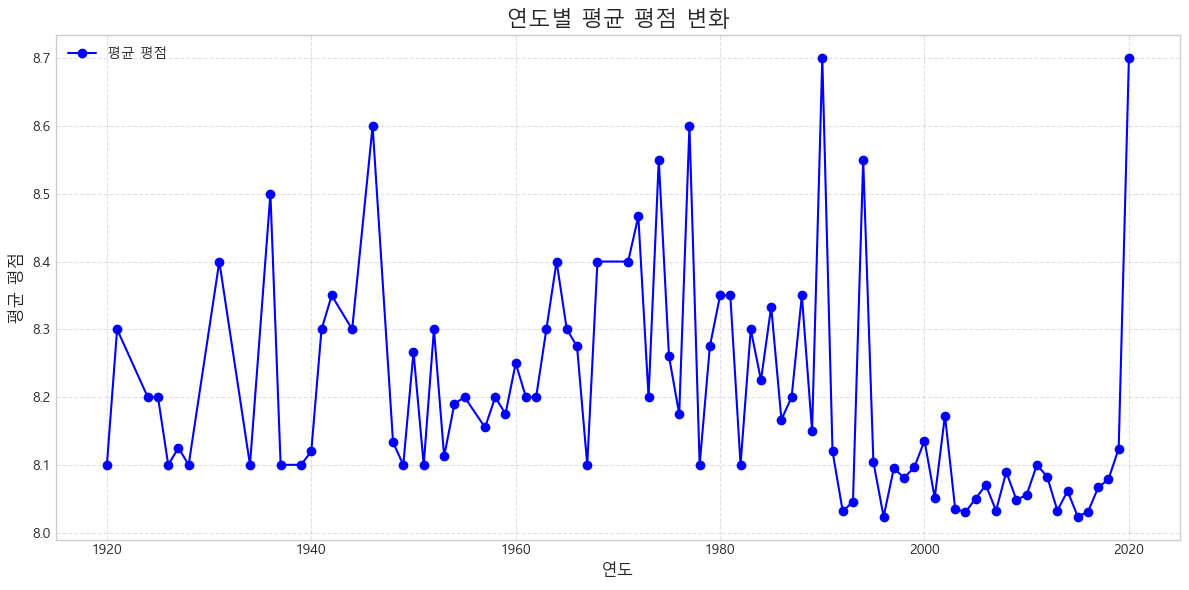

In [112]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
mpl.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 연도와 평균 평점을 분리
years_sorted = [year for year, (avg, count) in sorted_years]
avg_ratings = [avg for year, (avg, count) in sorted_years]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(years_sorted, avg_ratings, marker="o", linestyle="-", color="b", label="평균 평점")

# 그래프 꾸미기
plt.title("연도별 평균 평점 변화", fontsize=16)
plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 평점", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# 그래프 저장
plt.savefig("visuals/avg_rating_by_year.png", dpi=300, bbox_inches="tight")

# 그래프 화면 출력
plt.show()




### 막대 그래프

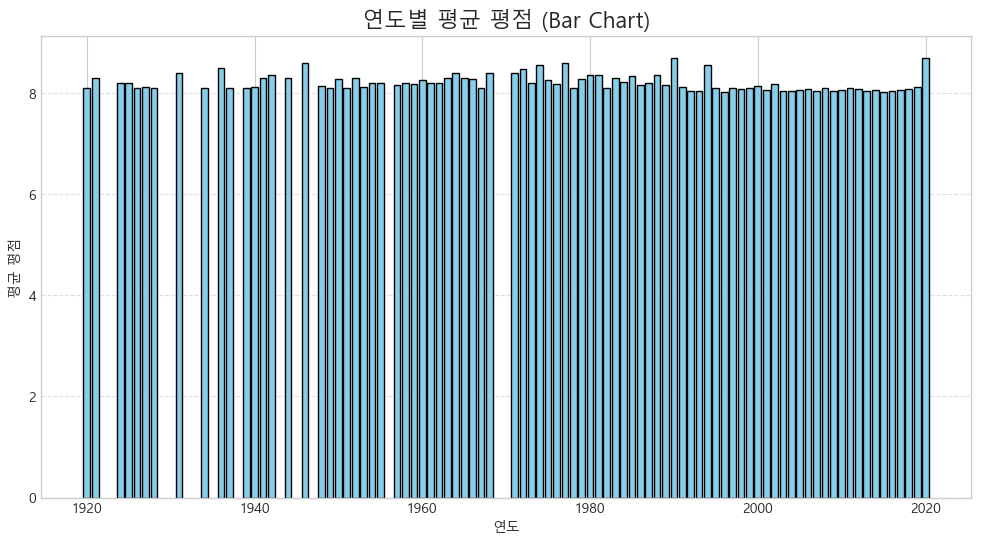

In [113]:
plt.figure(figsize=(12,6))
plt.bar(years_sorted, avg_ratings, color="skyblue", edgecolor="black")
plt.title("연도별 평균 평점 (Bar Chart)", fontsize=16)
plt.xlabel("연도")
plt.ylabel("평균 평점")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 저장
plt.savefig("visuals/avg_rating_by_year_bar.png", dpi=300, bbox_inches="tight")

# 화면 출력
plt.show()



### 산점도 표현

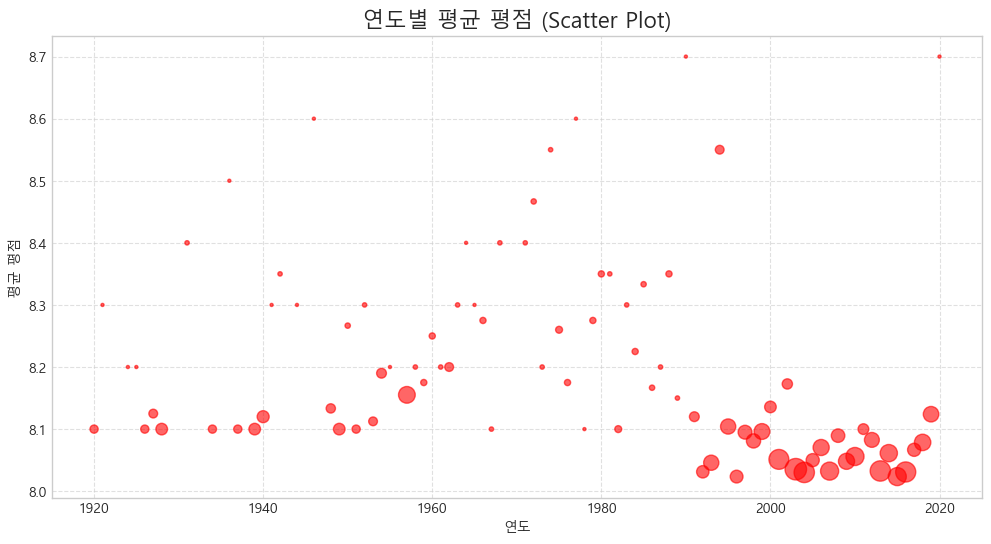

In [114]:
counts = [count for year, (avg, count) in sorted_years]

plt.figure(figsize=(12,6))
plt.scatter(
    years_sorted, avg_ratings,
    s=[c*5 for c in counts],   # 점 크기 → 영화 개수 비례
    color="red", alpha=0.6
)
plt.title("연도별 평균 평점 (Scatter Plot)", fontsize=16)
plt.xlabel("연도")
plt.ylabel("평균 평점")
plt.grid(True, linestyle="--", alpha=0.6)

# 저장
plt.savefig("visuals/avg_rating_by_year_scatter.png", dpi=300, bbox_inches="tight")

# 화면 출력
plt.show()


### 이동 평균선

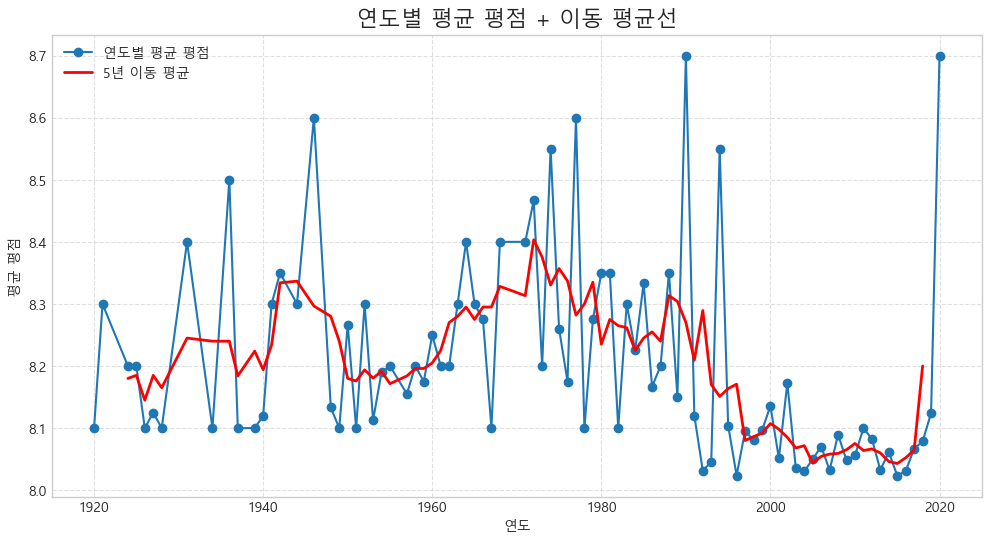

In [115]:
import pandas as pd

# Pandas Series로 변환 후 rolling average
avg_series = pd.Series(avg_ratings, index=years_sorted)
rolling_avg = avg_series.rolling(window=5, center=True).mean()

plt.figure(figsize=(12,6))
plt.plot(years_sorted, avg_ratings, marker="o", label="연도별 평균 평점")
plt.plot(years_sorted, rolling_avg, color="red", linewidth=2, label="5년 이동 평균")
plt.title("연도별 평균 평점 + 이동 평균선", fontsize=16)
plt.xlabel("연도")
plt.ylabel("평균 평점")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 저장
plt.savefig("visuals/avg_rating_by_year_trend.png", dpi=300, bbox_inches="tight")

# 화면 출력
plt.show()


### 연도별 색상 그라데이션 막대 그래프

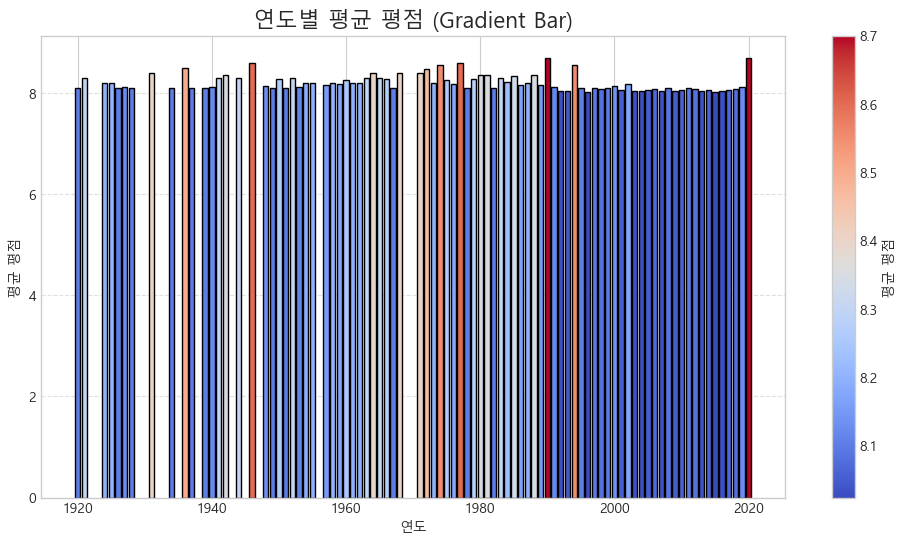

In [116]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 색상 맵 지정 (평점에 따라 색상 바뀜)
norm = plt.Normalize(min(avg_ratings), max(avg_ratings))
colors = cm.coolwarm(norm(avg_ratings))

# figure, ax를 명시적으로 생성
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(years_sorted, avg_ratings, color=colors, edgecolor="black")

# 컬러바 추가 (ax 명시)
sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="평균 평점")

# 제목 및 라벨
ax.set_title("연도별 평균 평점 (Gradient Bar)", fontsize=16)
ax.set_xlabel("연도")
ax.set_ylabel("평균 평점")
ax.grid(axis="y", linestyle="--", alpha=0.6)

# 저장
plt.savefig("visuals/avg_rating_by_year_gradient.png", dpi=300, bbox_inches="tight")

# 화면 출력
plt.show()


### Seaborn 써서 히트맵으로 표현해보기

In [87]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


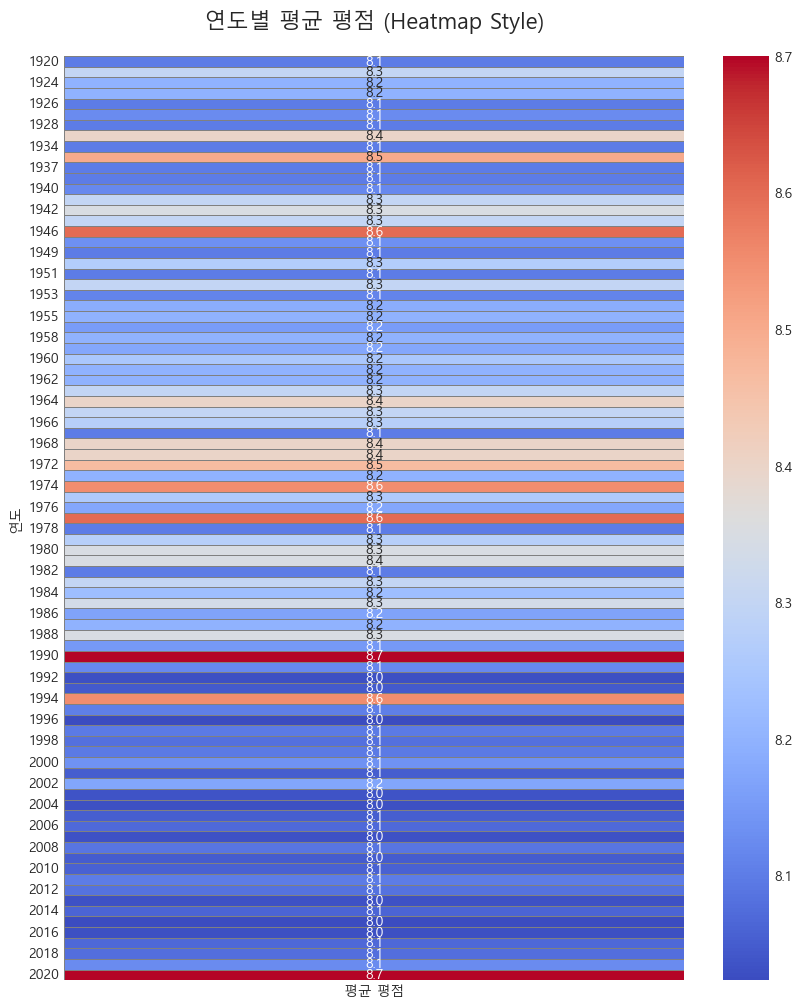

In [117]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 만들기
df_year = pd.DataFrame({
    "Year": years_sorted,
    "Rating": avg_ratings
})
df_year["dummy"] = "평균 평점"

plt.figure(figsize=(10, 12))
sns.heatmap(
    df_year.pivot(index="Year", columns="dummy", values="Rating"),
    cmap="coolwarm",
    annot=True,          # 평점 숫자 표시
    fmt=".1f",           # 소수점 1자리
    cbar=True,           # 색상바 표시
    linewidths=0.5,      # 셀 구분선
    linecolor="gray"
)

plt.title("연도별 평균 평점 (Heatmap Style)", fontsize=16, pad=20)
plt.ylabel("연도")
plt.xlabel("")

# 저장
plt.savefig("visuals/avg_rating_by_year_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()


